In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data

In [2]:
X = np.linspace(0, 10, 100).astype(np.float32)             # 100 input values from 0 to 10
y = 4 * X + 1 + np.random.randn(*X.shape) * 0.5             # Target: linear relation + noise

# Convert to tensors

In [3]:
X_tensor = tf.convert_to_tensor(X.reshape(-1, 1))           # Reshape to column vector
y_tensor = tf.convert_to_tensor(y.reshape(-1, 1))           # Reshape to column vector

# Initialize weight and bias variables

In [4]:

W = tf.Variable(tf.random.normal([1, 1]))                   # Weight initialized randomly
b = tf.Variable(tf.zeros([1]))                              # Bias initialized as zero

# Set learning rate and number of epochs

In [5]:
lr = 0.01
epochs = 200

# Training loop using GradientTape

In [8]:
X_tensor = tf.convert_to_tensor(X_tensor, dtype=tf.float32)
y_tensor = tf.cast(y_tensor, dtype=tf.float32)

W = tf.Variable(tf.random.normal([X_tensor.shape[1], 1], dtype=tf.float32))
b = tf.Variable(tf.zeros([1], dtype=tf.float32))

for epoch in range(epochs):
    with tf.GradientTape() as tape:                         # Record operations for auto-diff
        y_pred = tf.matmul(X_tensor, W) + b                 # Compute predictions: y = Wx + b
        loss = tf.reduce_mean(tf.square(y_pred - y_tensor))# Mean Squared Error loss
 
    gradients = tape.gradient(loss, [W, b])                 # Compute gradients w.r.t W and b
    W.assign_sub(lr * gradients[0])                         # Update weights
    b.assign_sub(lr * gradients[1])                         # Update bias

# Make predictions after training

In [9]:
y_pred = tf.matmul(X_tensor, W) + b                         # Final prediction line

# Plot results

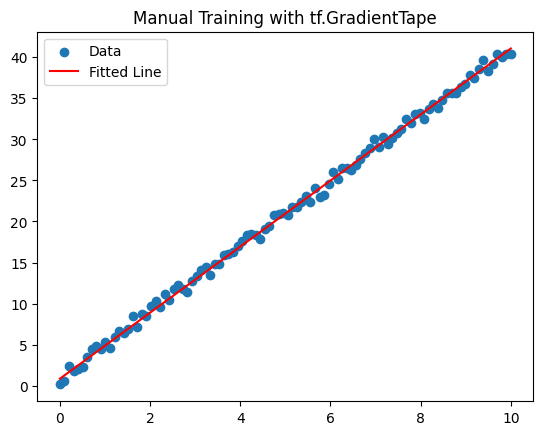

In [10]:
plt.scatter(X, y, label='Data')                             # Plot original data
plt.plot(X, y_pred.numpy(), color='red', label='Fitted Line') # Plot regression line
plt.title("Manual Training with tf.GradientTape")
plt.legend()
plt.show()